In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv('/content/weight-height.csv')
df.sample(10)

,Gender,Height
3093,Male,67.467771
4456,Male,68.096760
3769,Male,72.410727
2647,Male,65.661124
1504,Male,69.104803
2613,Male,65.892686
3470,Male,71.453737
3878,Male,68.915212
5174,Female,66.252604
7099,Female,66.835489


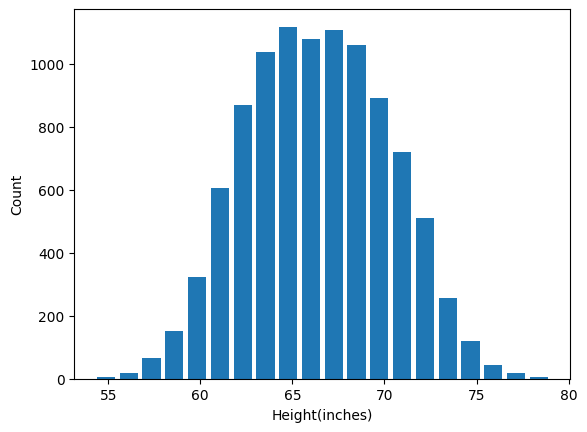

In [8]:
# plot histplot and bellcurve
plt.hist(df.Height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()


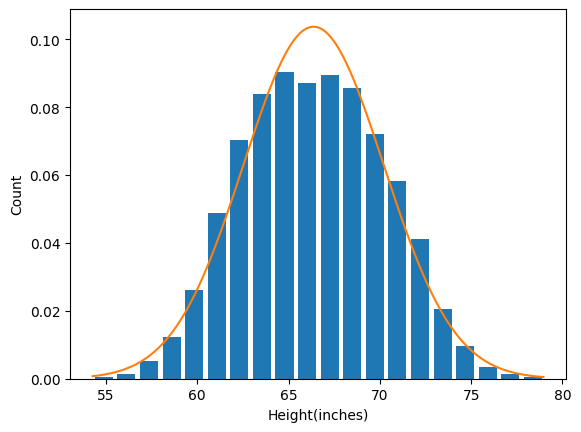

In [10]:
# We can see Bell curve by making normal distribution
from scipy.stats import norm
import numpy as np
plt.hist(df.Height,bins=20,rwidth=0.8,density=True )
plt.xlabel('Height(inches)')
plt.ylabel('Count')
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [11]:
df.Height.mean()
df.Height.std()

3.847528120795573

In [15]:
upper_limit=df.Height.mean()+3*df.Height.std()
lower_limit=df.Height.mean()-3*df.Height.std()
upper_limit,lower_limit

(77.91014411725271, 54.824975392479274)

In [16]:
outliers=df[(df.Height>upper_limit)|(df.Height<lower_limit)]
outliers

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [17]:
df_no_outlier=df[(df.Height< upper_limit)&(df.Height>lower_limit)]
df_no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [19]:
# we can seprate outliers from the given data
df.shape[0]-df_no_outlier.shape[0]

7

In [21]:
# Using Zscore to remove outliers
df['Zscore']=df.Height-df.Height.mean()/df.Height.std()
df

,Gender,Height,Zscore
0,Male,73.847017,56.597615
1,Male,68.781904,51.532502
2,Male,74.110105,56.860703
3,Male,71.730978,54.481576
4,Male,69.881796,52.632394
...,...,...,...
9995,Female,66.172652,48.923250
9996,Female,67.067155,49.817753
9997,Female,63.867992,46.618590
9998,Female,69.034243,51.784841


In [22]:
outliers=df[(df['Zscore']>3)|(df['Zscore']<-3)]
outliers

,Gender,Height,Zscore
0,Male,73.847017,56.597615
1,Male,68.781904,51.532502
2,Male,74.110105,56.860703
3,Male,71.730978,54.481576
4,Male,69.881796,52.632394
...,...,...,...
9995,Female,66.172652,48.923250
9996,Female,67.067155,49.817753
9997,Female,63.867992,46.618590
9998,Female,69.034243,51.784841


In [23]:
df_no_outliers=df[(df['Zscore']<3)&(df['Zscore']>-3)]
df_no_outliers.head()
# not any outliers is seen here using Z score

,Gender,Height,Zscore


In [24]:
df.shape[0]-df_no_outliers.shape[0]


10000